### Import libraries

In [15]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.model_selection import train_test_split

### Import datasets

In [17]:
dataset=pd.read_csv('airline_data.csv')
print(dataset.shape)
print(dataset.head(5))

(3339, 12)
     tweet_id airline_sentiment  airline_sentiment_confidence negativereason  \
0  Tr_tweet_1           neutral                        1.0000            NaN   
1  Tr_tweet_2          positive                        0.3486            NaN   
2  Tr_tweet_3           neutral                        0.6837            NaN   
3  Tr_tweet_4          negative                        1.0000     Bad Flight   
4  Tr_tweet_5          negative                        1.0000     Can't Tell   

   negativereason_confidence         airline        name  retweet_count  \
0                        NaN  Virgin America     cairdin            0.0   
1                     0.0000  Virgin America    jnardino            0.0   
2                        NaN  Virgin America  yvonnalynn            0.0   
3                     0.7033  Virgin America    jnardino            0.0   
4                     1.0000  Virgin America    jnardino            0.0   

                                                text  \
0

### Segregating dataset into outpu and input

In [48]:
features = dataset.iloc[:, 8].values
labels = dataset.iloc[:, 1].values
labels

array(['neutral', 'positive', 'neutral', ..., 'negative', 'negative',
       'negative'], dtype=object)

### Removing special characters

In [49]:
processed_features=[]

for sentence in range(0,len(features)):
    #remove all the special char
    processed_feature=re.sub(r'\W', ' ', str(features[sentence]))
    
    #removing all single char
    processed_feature=re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    
    #removing single char from the start
    processed_feature=re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    
    #substituting multiple spaces with single space
    processed_feature=re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    
    #removingg prefixed 'b'
    processed_feature=re.sub(r'^b\s+', ' ', processed_feature)
    
    #converting lower case
    processed_feature=processed_feature.lower()
    
    processed_features.append(processed_feature)
    
print(processed_features)

[' virginamerica what dhepburn said ', ' virginamerica plus you ve added commercials to the experience tacky ', ' virginamerica didn today must mean need to take another trip ', ' virginamerica it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse', ' virginamerica and it a really big bad thing about it', ' virginamerica seriously would pay 30 flight for seats that didn have this playing it really the only bad thing about flying va', ' virginamerica yes nearly every time fly vx this ear worm won go away ', ' virginamerica well didn but now do d', ' virginamerica it was amazing and arrived an hour early you re too good to me ', ' virginamerica lt', ' virginamerica this is such great deal already thinking about my 2nd trip to australia amp', ' virginamerica thanks ', ' virginamerica sfo pdx schedule is still mia ', ' virginamerica so excited for my first cross country flight lax to mco ve heard nothing but great things about virgin ameri

### Feature extraction from text

In [50]:
nltk.download('stopwords')
vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()
print(processed_features)

[nltk_data] Downloading package stopwords to C:\Users\Ramakrish
[nltk_data]     PCS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.43103264 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


### splitting dataset

In [51]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.20, random_state=0)

###  loading random forest

In [55]:
text_classifier= RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

### Predicting the test data with trained model

In [56]:
predictions= text_classifier.predict(X_test)

### score the model

In [57]:
print(accuracy_score(y_test,predictions))

0.7215568862275449


### confusion matrix

[[381  29  19]
 [ 75  48   7]
 [ 44  12  53]]


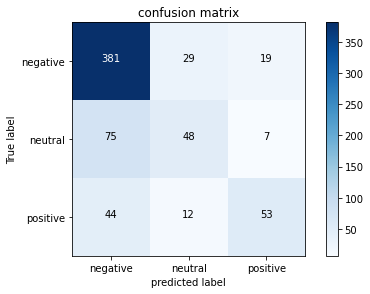

In [64]:
import itertools
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title="confusion matrix",
                         cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    thresh=cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')
    
cm=confusion_matrix(y_test, predictions, labels=['negative','neutral','positive'])
plot_confusion_matrix(cm, classes=['negative','neutral','positive'])
print(cm)